Prediction a partir des donnees collectes sur OpenStreet Map si nous devons cree une borne dans une grille

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('paris_df.csv')

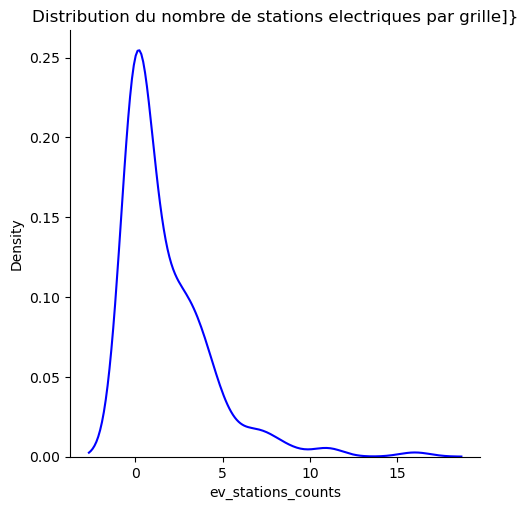

In [5]:
# Create the distribution plot without x-axis values

sns.displot(df['ev_stations_counts'], color='Blue', kind='kde')
plt.title('Distribution du nombre de stations electriques par grille]}')
plt.show()

In [7]:
# Filter for numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate summary statistics and transpose
summary_stats = df_numeric.describe().T 

# Sort by standard deviation in descending order
sorted_stats = summary_stats.sort_values(by='std', ascending=False)

# Apply styling: background gradient and bar charts
styled_stats = sorted_stats.style.background_gradient(cmap='GnBu') \
                          .bar(subset=['max'], color='#BB0000') \
                          .bar(subset=['mean'], color='green') 

# Display the styled DataFrame
styled_stats


,count,mean,std,min,25%,50%,75%,max
edges,174.000000,89.735632,68.299994,0.000000,15.500000,100.500000,143.750000,227.000000
restaurant_counts,174.000000,48.936782,65.168714,0.000000,1.000000,25.500000,68.750000,345.000000
nodes,174.000000,53.155172,38.516479,0.000000,10.500000,60.500000,85.750000,130.000000
pop_density,174.000000,39.224063,12.996985,0.000000,30.947661,39.762516,46.848177,66.974038
parking_counts,174.000000,5.850575,9.955425,0.000000,1.000000,3.000000,6.750000,74.000000
school_counts,174.000000,6.660920,6.569765,0.000000,0.000000,6.000000,11.750000,30.000000
retail_counts,174.000000,4.195402,6.500047,0.000000,0.000000,2.000000,5.000000,40.000000
park_counts,174.000000,3.258621,3.764269,0.000000,0.000000,2.000000,5.000000,19.000000
place_of_worship_counts,174.000000,2.212644,2.661144,0.000000,0.000000,1.000000,4.000000,12.000000
ev_stations_counts,174.000000,1.718391,2.495315,0.000000,0.000000,1.000000,3.000000,16.000000


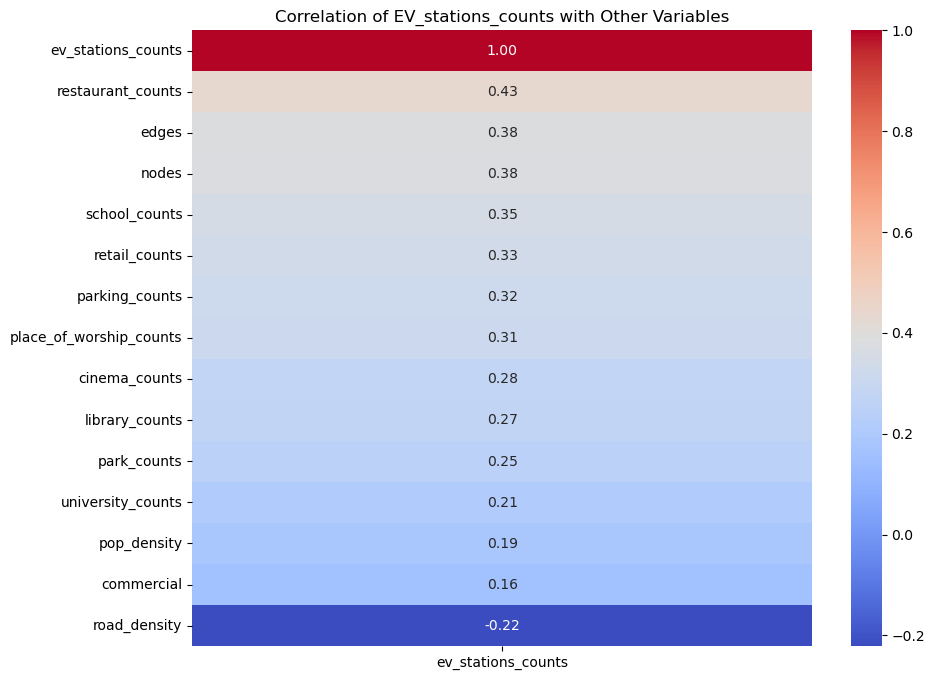

In [ ]:


# Calculer la matrice de  correlation matrix avec le nombre de stations par grille
correlation_matrix = df_numeric.corr()['ev_stations_counts'].sort_values(ascending=False)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Correlation of EV_stations_counts with Other Variables')
plt.show()

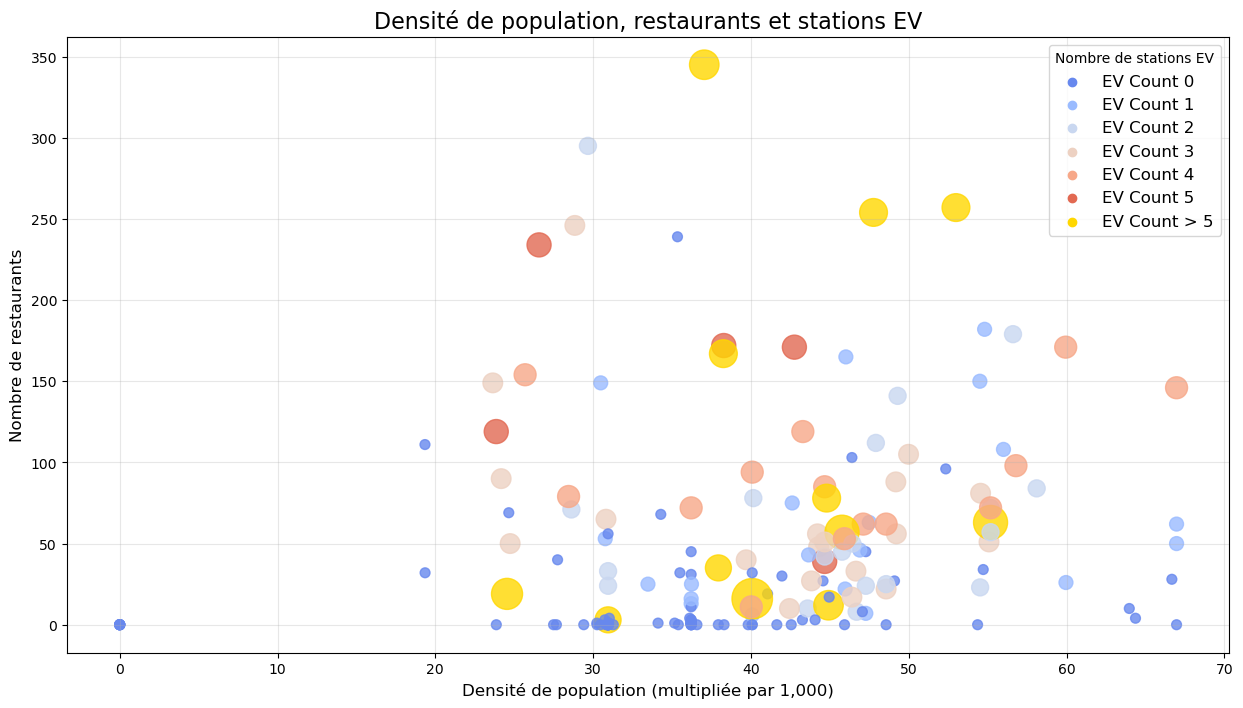

In [ ]:
# Définir une palette de couleurs personnalisée et appliquer la correspondance des couleurs
palette_couleurs = sns.color_palette("coolwarm", n_colors=6)
couleurs_ev = df_numeric['ev_stations_counts'].apply(lambda x: palette_couleurs[int(x)] if x <= 5 else 'gold')

# Graphique à bulles
plt.figure(figsize=(15, 8))
plt.scatter(
    df_numeric['pop_density'], 
    df_numeric['restaurant_counts'], 
    s=(df_numeric['ev_stations_counts'] + 1) * 50, 
    alpha=0.8, 
    c=couleurs_ev
)

# Légende et étiquettes
for i in range(6):
    plt.scatter([], [], color=palette_couleurs[i], label=f'EV Count {i}')
plt.scatter([], [], color='gold', label='EV Count > 5')
plt.legend(title='Nombre de stations EV', fontsize=12)

# Titres et étiquettes en français
plt.title('Densité de population, restaurants et stations EV', fontsize=16)
plt.xlabel('Densité de population (multipliée par 1,000)', fontsize=12)
plt.ylabel('Nombre de restaurants', fontsize=12)
plt.grid(alpha=0.3)
plt.show()
